In [1]:
import geopandas as gpd
import json
import pandas as pd
import requests
from shapely.geometry import Point

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

### API Parameters

In [2]:
# Rodent Inspections
params_inspections = {
    '$where': "inspection_date between '2023-02-01T00:00:00' and '2023-02-28T23:59:59' AND latitude > 0.1",
    '$limit': 5000  # Limit the number of records, adjust as needed
}

inspections_url = 'https://data.cityofnewyork.us/resource/p937-wjvj.geojson'
# https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj



# 311 Rat Sightings
params_sightings = {
    '$where': "created_date between '2023-02-01T00:00:00' and '2023-02-28T23:59:59'",
    '$limit': 5000  # Limit the number of records, adjust as needed
}
sightings_url = 'https://data.cityofnewyork.us/resource/3q43-55fe.geojson'
# https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe



# DOH Restaurant Inspections
params_restaurants = {
    '$where': "inspection_date between '2023-02-01T00:00:00' and '2023-02-28T23:59:59' AND latitude > 0.1",
    '$limit': 5000  # Limit the number of records, adjust as needed
}
restaurants_url = 'https://data.cityofnewyork.us/resource/43nn-pn8j.geojson'
# https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j


# Subway Entrances
subways_url = 'https://data.cityofnewyork.us/resource/he7q-3hwy.geojson'
# https://data.cityofnewyork.us/Transportation/Subway-Entrances/drex-xx56

# Census Tracts
params_census = {
    '$limit': 5000  # Limit the number of records, adjust as needed
}
census_url = 'https://data.cityofnewyork.us/resource/nahe-je7c.geojson'
# https://data.cityofnewyork.us/Housing-Development/Housing-Database-by-Census-Tract-Map-/qsh3-jj2w

####  TODO 
Waste collection weights - we may or may not use this dataset. https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5  



### Rodent Inspections

In [3]:
inspections_response = requests.get(inspections_url, params=params_inspections)
inspections_json = inspections_response.json()
inspections_gdf = gpd.GeoDataFrame.from_features(inspections_json['features'])
print(len(inspections_gdf))
inspections_gdf.head()

5000


,geometry,location_state,zip_code,house_number,x_coord,location_zip,approved_date,latitude,y_coord,result,location_address,job_ticket_or_work_order_id,bbl,location_city,job_id,longitude,street_name,inspection_date,block,inspection_type,job_progress,lot,boro_code,borough
0,POINT (-74.00292 40.72710),,10012,38,None,,2023-02-02T15:00:16.000,40.727102267386,None,Rat Activity,,13571563,1005180001,,PC8033545,-74.002915208541,MAC DOUGAL STREET,2023-02-01T00:00:59.000,00518,Initial,1,0001,1,Manhattan
1,POINT (-73.94131 40.82368),,10039,2745,1000493,,2023-02-02T14:04:24.000,40.823677961443,239373,Passed,,13571332,1020450031,,PC8034318,-73.941310985608,FREDRICK DOUGLAS BOULEVARD,2023-02-01T07:30:23.000,02045,Initial,1,0031,1,Manhattan
2,POINT (-73.86420 40.83598),,10460,1412,1021828,,2023-02-02T10:12:48.000,40.835983236308,243880,Rat Activity,,13571618,2039020006,,PC8035195,-73.864198363161,LELAND AVENUE,2023-02-01T07:30:26.000,03902,Initial,1,0006,2,Bronx
3,POINT (-73.85206 40.86157),,10469,2418,None,,2023-02-06T12:20:47.000,40.861571164193,None,Passed,,13570755,2044600012,,PC8034529,-73.852063714843,PEARSALL AVENUE,2023-02-01T07:30:43.000,04460,Initial,1,0012,2,Bronx
4,POINT (-73.85206 40.86160),,10469,2420,None,,2023-02-06T12:20:48.000,40.861598611448,None,Passed,,13570756,2044600112,,PC8034569,-73.852063653553,PEARSALL AVENUE,2023-02-01T07:35:43.000,04460,Initial,1,0112,2,Bronx


<AxesSubplot:>

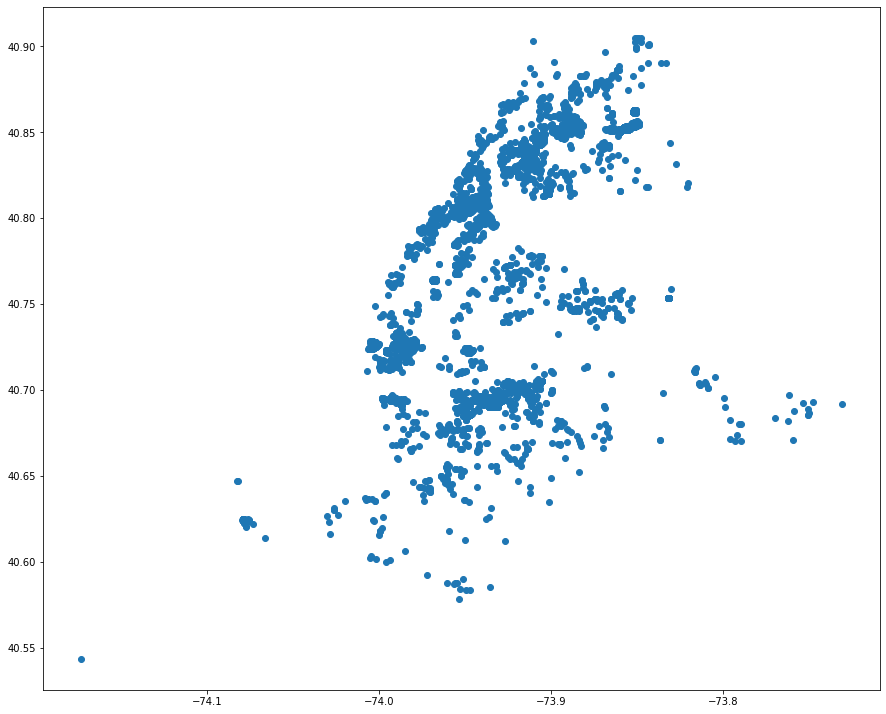

In [4]:
inspections_gdf.plot(figsize=(15,15))

### 311 Rat Sightings

In [5]:
sightings_response = requests.get(sightings_url, params=params_sightings)
sightings_json = sightings_response.json()
sightings_gdf = gpd.GeoDataFrame.from_features(sightings_json['features'])
print(len(sightings_gdf))
sightings_gdf.head()

1707


,geometry,location_state,facility_type,intersection_street_2,city,location_zip,park_borough,latitude,road_ramp,created_date,y_coordinate_state_plane_,agency,park_facility_name,location_address,agency_name,descriptor,location_city,cross_street_2,bridge_highway_direction,longitude,bridge_highway_segment,street_name,incident_address,address_type,incident_zip,unique_key,complaint_type,status,bridge_highway_name,location_type,x_coordinate_state_plane_,due_date,taxi_company_borough,taxi_pick_up_location,community_board,resolution_action_updated_date,intersection_street_1,closed_date,vehicle_type,cross_street_1,borough,landmark
0,POINT (-73.81686 40.68855),,None,107 AVENUE,SOUTH RICHMOND HILL,,QUEENS,40.68855316839335,None,2023-02-28T23:57:24.000,190188,DOHMH,Unspecified,,Department of Health and Mental Hygiene,Rat Sighting,,107 AVENUE,None,-73.81685961403421,None,128 STREET,104-64 128 STREET,ADDRESS,11419,56923097,Rodent,Closed,None,3+ Family Apt. Building,1035040,None,None,None,10 QUEENS,2023-02-28T23:57:24.000,LIBERTY AVENUE,2023-02-28T23:57:24.000,None,LIBERTY AVENUE,QUEENS,128 STREET
1,POINT (-73.88449 40.84784),,None,EAST 182 STREET,BRONX,,BRONX,40.847835952984276,None,2023-02-28T23:51:26.000,248188,DOHMH,Unspecified,,Department of Health and Mental Hygiene,Rat Sighting,,EAST 182 STREET,None,-73.88448882397334,None,MAPES AVENUE,2140 MAPES AVENUE,ADDRESS,10460,56922949,Rodent,Closed,None,3+ Family Mixed Use Building,1016208,None,None,None,06 BRONX,2023-02-28T23:51:26.000,EAST 181 STREET,2023-02-28T23:51:26.000,None,EAST 181 STREET,BRONX,MAPES AVENUE
2,POINT (-73.96214 40.71315),,None,SOUTH 3 STREET,BROOKLYN,,BROOKLYN,40.71315402787544,None,2023-02-28T23:20:07.000,199100,DOHMH,Unspecified,,Department of Health and Mental Hygiene,Rat Sighting,,SOUTH 3 STREET,None,-73.96214281545623,None,BEDFORD AVENUE,313 BEDFORD AVENUE,ADDRESS,11211,56917735,Rodent,Closed,None,Commercial Building,994745,None,None,None,01 BROOKLYN,2023-02-28T23:20:07.000,SOUTH 2 STREET,2023-03-01T08:29:57.000,None,SOUTH 2 STREET,BROOKLYN,BEDFORD AVENUE
3,POINT (-73.90739 40.67808),,None,SACKMAN STREET,BROOKLYN,,BROOKLYN,40.678083274486475,None,2023-02-28T23:03:55.000,186334,DOHMH,Unspecified,,Department of Health and Mental Hygiene,Rat Sighting,,SACKMAN STREET,None,-73.9073878892617,None,FULTON STREET,2218 FULTON STREET,ADDRESS,11233,56918772,Rodent,Closed,None,3+ Family Apt. Building,1009938,None,None,None,16 BROOKLYN,2023-02-28T23:03:55.000,EASTERN PARKWAY,2023-02-28T23:03:55.000,None,EASTERN PARKWAY,BROOKLYN,FULTON STREET
4,POINT (-73.93110 40.79758),,None,PALADINO AVENUE,NEW YORK,,MANHATTAN,40.7975817467369,None,2023-02-28T22:54:39.000,229865,DOHMH,Unspecified,,Department of Health and Mental Hygiene,Rat Sighting,,PALADINO AVENUE,None,-73.9310952446459,None,EAST 120 STREET,505 EAST 120 STREET,ADDRESS,10035,56920897,Rodent,Closed,None,Other (Explain Below),1003328,None,None,None,11 MANHATTAN,2023-02-28T22:54:39.000,PLEASANT AVENUE,2023-03-08T07:38:30.000,None,PLEASANT AVENUE,MANHATTAN,EAST 120 STREET


<AxesSubplot:>

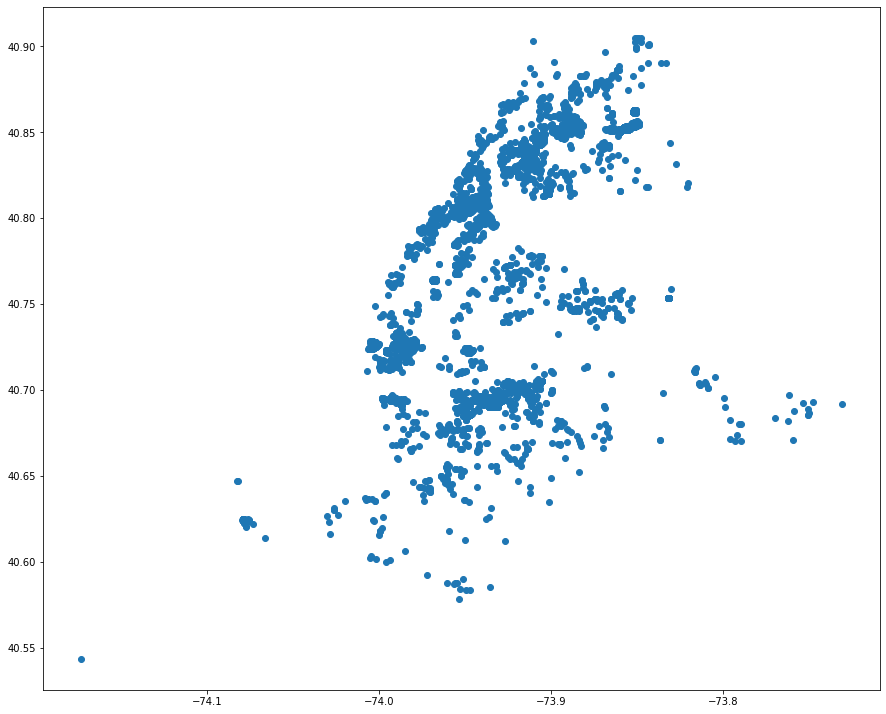

In [6]:
inspections_gdf.plot(figsize=(15,15))

### Restaurant Inspections

In [7]:
restaurants_response = requests.get(restaurants_url, params=params_restaurants)
restaurants_json = restaurants_response.json()
restaurants_gdf = gpd.GeoDataFrame.from_features(restaurants_json['features'])
print(len(restaurants_gdf))
restaurants_gdf['geometry'] = restaurants_gdf.apply(lambda row: Point(float(row['longitude']), float(row['latitude'])), axis=1)
restaurants_gdf.head()

5000


/Users/sarahbergquist/opt/anaconda3/envs/carto-comps-env/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,geometry,nta,zipcode,latitude,dba,violation_code,score,cuisine_description,bbl,building,longitude,inspection_date,grade_date,grade,violation_description,inspection_type,census_tract,boro,bin,street,community_board,record_date,critical_flag,action,phone,council_district,camis
0,POINT (-73.99963 40.71500),MN27,10013,40.714995135114,EL SITIO RESTAURANT,04M,13,Spanish,1001640009,46,-73.999628450833,2023-02-02T00:00:00.000,2023-02-02T00:00:00.000,Z,Live roaches in facility's food or non-food area.,Cycle Inspection / Reopening Inspection,002900,Manhattan,1079227,MULBERRY STREET,103,2023-04-03T06:00:11.000,Critical,Establishment re-opened by DOHMH.,9174493780,01,50118302
1,POINT (-73.99323 40.71566),MN27,10002,40.71566191459,SONG BO YUAN,04M,9,Chinese,1003000001,36,-73.993229079693,2023-02-01T00:00:00.000,2023-02-01T00:00:00.000,Z,Live roaches in facility's food or non-food area.,Cycle Inspection / Reopening Inspection,001600,Manhattan,1079649,ELDRIDGE STREET,103,2023-04-03T06:00:11.000,Critical,Establishment re-opened by DOHMH.,2122192228,01,50100671
2,POINT (-73.86104 40.72965),QN18,11374,40.729653102964,BAMBOO YA,04L,50,Japanese,4020900064,9711,-73.861035125104,2023-02-02T00:00:00.000,None,None,Evidence of mice or live mice in establishment...,Cycle Inspection / Initial Inspection,071701,Queens,4050459,QUEENS BLVD,406,2023-04-03T06:00:11.000,Critical,Violations were cited in the following area(s).,7188061228,29,41633095
3,POINT (-73.90139 40.84771),BX41,10457,40.84770827191,MUNCHIES,02B,12,Hamburgers,2028920118,394,-73.901392854841,2023-02-23T00:00:00.000,2023-02-23T00:00:00.000,A,Hot TCS food item not held at or above 140 °F.,Cycle Inspection / Initial Inspection,023100,Bronx,2009390,EAST TREMONT AVENUE,205,2023-04-03T06:00:11.000,Critical,Violations were cited in the following area(s).,3475775934,15,50051282
4,POINT (-73.98708 40.69221),BK38,11201,40.692210064197,99 CENTS SUPREME PIZZA,04M,46,Pizza,3001510022,44,-73.987075966925,2023-02-23T00:00:00.000,None,None,Live roaches in facility's food or non-food area.,Pre-permit (Operational) / Initial Inspection,001100,Brooklyn,3000389,WILLOUGHBY STREET,302,2023-04-03T06:00:11.000,Critical,Violations were cited in the following area(s).,6464274438,33,50131913


<AxesSubplot:>

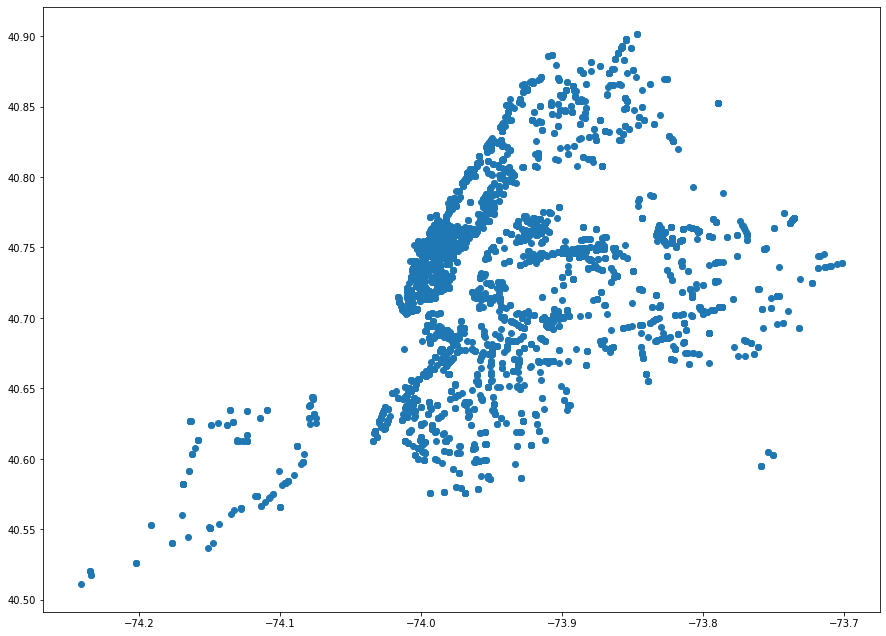

In [8]:
restaurants_gdf.plot(figsize=(15,15))

### Subway Entrances

In [9]:
subways_response = requests.get(subways_url)
subways_json = subways_response.json()
subways_gdf = gpd.GeoDataFrame.from_features(subways_json['features'])
print(len(subways_gdf))
subways_gdf.head()

1000


,geometry,objectid,url,name,line
0,POINT (-73.86836 40.84917),1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,2-5
1,POINT (-73.86821 40.84913),1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,2-5
2,POINT (-73.87350 40.84122),1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,2-5
3,POINT (-73.87289 40.84145),1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,2-5
4,POINT (-73.87962 40.84082),1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,2-5


<AxesSubplot:>

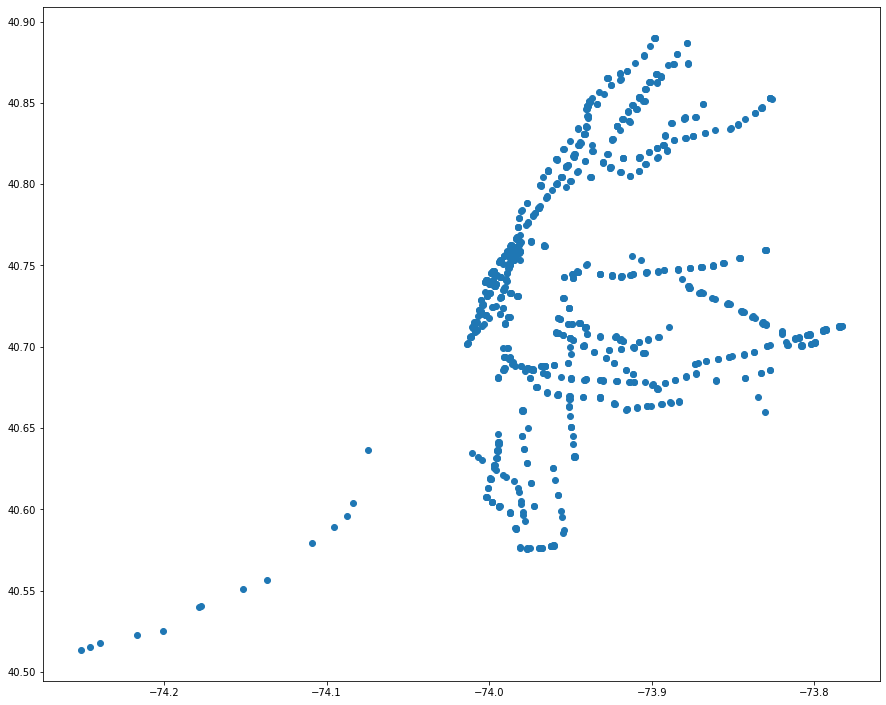

In [10]:
subways_gdf.plot(figsize=(15,15))

### Spatial Unit - 

Neighborhood Tabulation Area - Neighborhood Level 

Census Tract - Between size of block and NTA
https://data.cityofnewyork.us/City-Government/2020-Census-Tracts-Mapped/weqx-t5xr

Cencus Block - Seems very small 
https://data.cityofnewyork.us/City-Government/2020-Census-Blocks-Mapped/sbvv-hpwv

In [11]:
census_response = requests.get(census_url, params=params_census)
census_json = census_response.json()
census_gdf = gpd.GeoDataFrame.from_features(census_json['features'])
print(len(census_gdf))
census_gdf.head()

2165


,geometry,comp2016,centract10,cenunits10,shape_area,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010
0,"MULTIPOLYGON (((-73.95841 40.80743, -73.95913 ...",None,36061020101,313,593177.018676758,None,None,-28,None,None,285,1688,-28,None,313,None,3329.67845957574,None,None,Manhattan,None,None,285,None,None,None,None,1020101
1,"MULTIPOLYGON (((-73.95720 40.78019, -73.95770 ...",None,36061015001,1256,556354.405044556,None,None,0,11,16,1256,663,0,None,1256,-8,3124.39320903527,-10,-1,Manhattan,0,None,1256,0,None,7,12,1015001
2,"MULTIPOLYGON (((-73.94574 40.61537, -73.94658 ...",0,36047075600,758,1867819.4258728,None,0,0,None,0,753,223,None,-1,758,None,5582.96531621297,-2,1,Brooklyn,-1,0,753,0,-2,0,0,3075600
3,"MULTIPOLYGON (((-73.96094 40.62280, -73.96049 ...",0,36047053400,1479,1866105.77261353,0,None,None,None,0,1479,164,None,None,1479,None,5639.95131416622,0,-1,Brooklyn,3,None,1479,0,0,None,None,3053400
4,"MULTIPOLYGON (((-73.89723 40.66589, -73.89816 ...",None,36047113400,786,1651198.22203064,None,96,None,None,None,882,283,None,None,786,0,5266.48479663589,None,None,Brooklyn,12,None,882,2,0,None,259,3113400


<AxesSubplot:>

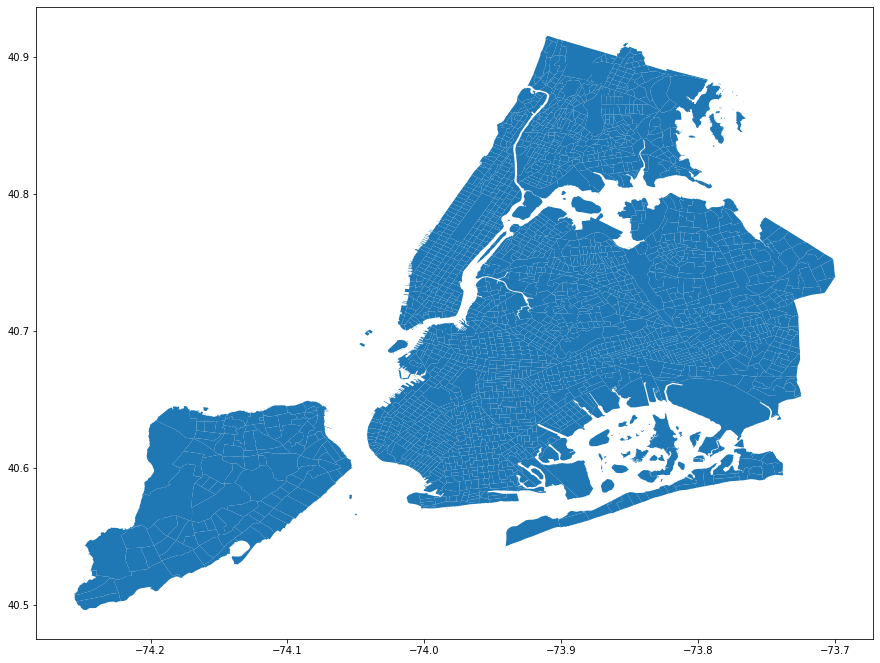

In [12]:
census_gdf.plot(figsize=(15,15))